In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [23]:
star = cr.Star(toiid=1827, search_radius=30)

Target: TOI 1827
Searching Vizier: (191.982 9.74942) with radius=3.0 arcsec


In [3]:
gaia_params = star.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(191.982 9.74942) within 15.0 arcsec.
astrometric_excess_noise_sig>15.13 (>5 hints binarity).

astrometric_gof_al>28.51 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf



In [4]:
#>5 hints binarity
gaia_params.astrometric_excess_noise_sig

15.125316639924558

In [5]:
#comoving wide companion is @d=50 according to the draft
gaia_sources = star.get_nearby_gaia_sources(radius=60)
gaia_sources

Querying Gaia DR2 catalog for ra,dec=(191.982 9.74942) within 60.0 arcsec.


,source_id,parallax,astrometric_gof_al,astrometric_excess_noise_sig,separation,phot_g_mean_mag,delta_Gmag,gamma_pri,gamma_sec,true_depth_pri,true_depth_sec,true_depth_sec>1(cleared?)
0,3735000631158990976,123.821473,28.511068,15.125317,0.038310,10.093957,0.000000,2.000000,2.000000,0.003199,0.003199,False
1,3735000592503232512,NaN,-0.005855,0.052219,38.270793,18.440784,8.346828,1.000458,2182.378559,0.001600,3.490776,True


Yep, Gaia DR2 3094290019967631360 have similar kinematics!

In [7]:
star.target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (191.98154167, 9.74941944, 8.07614364)>

## stellar parameters from literature

In [6]:
star.query_TGv8_catalog()

Gaia DR2 3735000631158990976 not found in TGv8 catalog.


In [8]:
star.query_vizier_param("Rad")

Found 1 references with Rad


{'I/345/gaia2': masked}

In [9]:
star.query_vizier_param("Teff")

Found 3 references with Teff


{'I/345/gaia2': 3588.46,
 'J/AJ/155/180/table1': 3255,
 'J/AJ/158/93/table2': 4918}

In [12]:
star.query_vizier_param("logg")

Found 0 references with logg


{}

In [13]:
star.query_vizier_param("__Fe_H_")

Found 0 references with __Fe_H_


{}

In [14]:
star.query_vizier_param("vsini")

Found 2 references with vsini


{'J/A+A/623/A44/tablea1': 2.0, 'J/A+A/627/A161/tableb1': 2.0}

In [16]:
star.get_star_inclination(Prot=130.1, Rstar=0.328, vsini=2.0)

nan

In [18]:
import numpy as np

cols = "Teff logg __Fe_H_ Rad Mass vsini".split()
params={}
for col in cols:
    pars = star.query_vizier_param(col)
    mean = np.nanmean(list(pars.values()))
    err = np.nanstd(list(pars.values()))
    
    params[col] = (mean,err)
    print(f"{col}: {mean:.2f}, {err:.2f}")

Found 3 references with Teff
Teff: 3920.49, 718.37
Found 0 references with logg
logg: nan, nan
Found 0 references with __Fe_H_
__Fe_H_: nan, nan
Found 1 references with Rad
Rad: nan, nan
Found 0 references with Mass
Mass: nan, nan
Found 2 references with vsini
vsini: 2.00, 0.00


## MAST data

In [19]:
mast_table = star.query_mast()
mast_table.head()

Searching MAST for (191.982 9.74942) with radius=3.0 arcsec
Available data: ['TESS/TESS', 'PS1/g', 'PS1/i', 'PS1/r', 'PS1/y', 'PS1/z'] in ['Optical', 'OPTICAL', 'OPTICAL;INFRARED']


,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
0,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0023-1-3,...,NaN,23.0,POLYGON 182.79929700 5.29971800 186.64770800 1...,NaN,NaN,PUBLIC,False,NaN,17000895380,0.0
1,science,PS1,3PI,GPC1,PS1,g,OPTICAL,1548.040,NaN,rings.v3.skycell.1548.040.stk.g,...,3PI,NaN,POLYGON ICRS 192.159389 9.576575 192.16...,https://ps1images.stsci.edu/cgi-bin/fitscut.cg...,http://ps1images.stsci.edu/data/ps1/node05/stp...,PUBLIC,NaN,5885.0,16000450255,0.0
2,science,PS1,3PI,GPC1,PS1,i,OPTICAL,1548.040,NaN,rings.v3.skycell.1548.040.stk.i,...,3PI,NaN,POLYGON ICRS 192.159389 9.576575 192.16...,https://ps1images.stsci.edu/cgi-bin/fitscut.cg...,http://ps1images.stsci.edu/data/ps1/node18/stp...,PUBLIC,NaN,5885.0,16000450256,0.0
3,science,PS1,3PI,GPC1,PS1,r,OPTICAL,1548.040,NaN,rings.v3.skycell.1548.040.stk.r,...,3PI,NaN,POLYGON ICRS 192.159389 9.576575 192.16...,https://ps1images.stsci.edu/cgi-bin/fitscut.cg...,http://ps1images.stsci.edu/data/ps1/node11/stp...,PUBLIC,NaN,5885.0,16000450257,0.0
4,science,PS1,3PI,GPC1,PS1,y,OPTICAL;INFRARED,1548.040,NaN,rings.v3.skycell.1548.040.stk.y,...,3PI,NaN,POLYGON ICRS 192.159389 9.576575 192.16...,https://ps1images.stsci.edu/cgi-bin/fitscut.cg...,http://ps1images.stsci.edu/data/ps1/node02/stp...,PUBLIC,NaN,5885.0,16000450258,0.0


## exofop spectra

In [20]:
star.query_specs_from_tfop()

Saved: /home/jp/github/research/project/chronos/chronos/data/tfop_sg2_spec_table.csv
There are 1 spectra in https://exofop.ipac.caltech.edu/tess/target.php?id=390651552



,TIC ID,TIC,TOI,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Appropriate to PRV,Obs date,User,Group,Tag,Notes
3174,390651552,NaN,NaN,Keck (10 m),HIRES,50000.0,3600 to 9000 Angstroms,80.0,5000 Angstroms,N,2020-06-02,giacalone,NaN,19508,NaN


## ESO spectra

In [21]:
eso_table = star.query_eso()
eso_table

Searching ESO: (191.982 9.74942) with diameter=3.0 arcsec
Available data:
Instrument Nspectra  
UVES       16        

Found 16 ['UVES'] spectra with SNR>1



,COLLECTION,TARGETNAME,s_ra,s_dec,APERTURE,em_min,em_max,SPECRP,SNR,t_min,t_max,CREATORDID,access_url,dp_id
0,UVES,Gl486,191.980964,9.74937,0.288,4.726440e-07,6.835010e-07,107200.0,45.7,57531.033641,57531.037460,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.448
1,UVES,Gl486,191.980964,9.74937,0.288,4.726440e-07,6.835010e-07,107200.0,47.3,57531.038031,57531.041850,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.470
2,UVES,Gl486,191.980964,9.74937,0.396,3.281910e-07,4.562910e-07,71050.0,3.9,57531.029250,57531.033069,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.480
3,UVES,Gl486,191.980964,9.74937,0.288,4.726430e-07,6.835050e-07,107200.0,41.7,57531.024828,57531.028647,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.511
4,UVES,Gl486,191.980964,9.74937,0.396,3.281910e-07,4.562910e-07,71050.0,3.0,57531.024874,57531.028693,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.531
5,UVES,Gl486,191.980964,9.74937,0.396,3.281910e-07,4.562910e-07,71050.0,3.8,57531.037995,57531.041814,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.547
6,UVES,Gl486,191.980964,9.74937,0.288,4.726430e-07,6.835050e-07,107200.0,47.6,57531.029249,57531.033069,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.593
7,UVES,Gl486,191.980964,9.74937,0.396,3.281910e-07,4.562910e-07,71050.0,3.6,57531.033621,57531.037440,ivo://eso.org/origfile?UV_SFLX_1342331_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:23:53.597
8,UVES,Gl486,191.980978,9.74943,0.396,3.281920e-07,4.562910e-07,71050.0,6.5,57532.108835,57532.112655,ivo://eso.org/origfile?UV_SFLX_1342466_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:28:31.619
9,UVES,Gl486,191.980978,9.74943,0.288,4.726430e-07,6.835000e-07,107200.0,71.3,57532.100081,57532.103901,ivo://eso.org/origfile?UV_SFLX_1342466_2016-05...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2016-06-13T13:28:31.626


## isochrones modeling

In [71]:
#include spectroscopic priors from draft and 5-sigma uncertainties
iso_params1 = star.get_iso_params(teff=(3340, 54*5),
                                #logg=(4.81, 0.06*5),
                                feh=(0.07, 0.16*5),
                                bands="G J H K".split()
                               )

Gaia radius=nan; TIC radius=0.331472
Gaia and TIC catalog cross-match succeeded.
No apass9 data in vizier
No 2mass data in vizier
No wise data in vizier


In [72]:
iso_model = star.init_isochrones(iso_params1)

{'Teff': [3340.0, 270.0], 'feh': [0.07, 0.8], 'parallax': [123.82147281727127, 0.11783138712947638], 'G': [10.0939569, 0.01], 'J': [7.195, 0.026], 'H': [6.666, 0.046], 'K': [6.362, 0.018]}


In [73]:
star.isochrones_model.observed_quantities

['G_mag', 'J_mag', 'H_mag', 'K_mag', 'Teff', 'feh', 'parallax']

In [74]:
star.isochrones_model._priors

{'mass': <isochrones.priors.ChabrierPrior at 0x7f1427ca4d90>,
 'feh': <isochrones.priors.FehPrior at 0x7f1426f4fdd0>,
 'age': <isochrones.priors.AgePrior at 0x7f1426f4f2d0>,
 'distance': <isochrones.priors.DistancePrior at 0x7f1426f4f110>,
 'AV': <isochrones.priors.AVPrior at 0x7f1426f4f550>,
 'eep': <isochrones.priors.EEP_prior at 0x7f1426f4f390>}

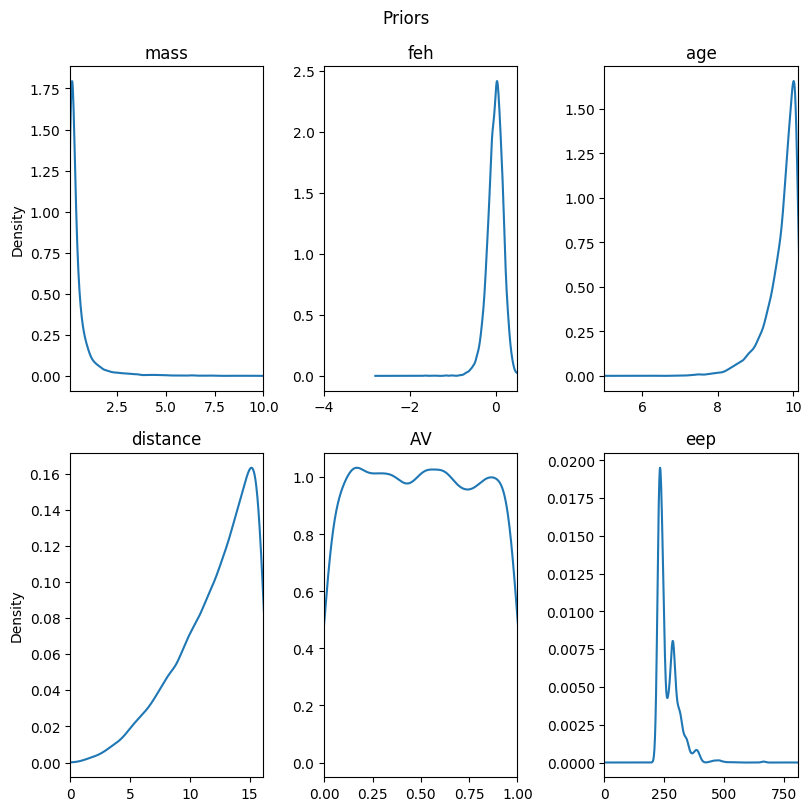

In [75]:
fig = star.plot_isochrones_priors()

In [76]:
star.estimate_Av()

0.05825317443162203

In [77]:
star.target_coord.distance

<Distance 8.07614364 pc>

In [78]:
iso_model = star.run_isochrones(overwrite=True)

Using previously initialized model.
Method: Nested Sampling
Initial values:
logpost=loglike+logprior = -319100.26 + -9.82 = -319110.08
Final values:
logpost=loglike+logprior = -20.97 + -6.53 = -27.51
  analysing data from ./chains/TOI 1827-mist-single-.txt
Model evidence: (-50.926719798118675, 0.04003976712381009)


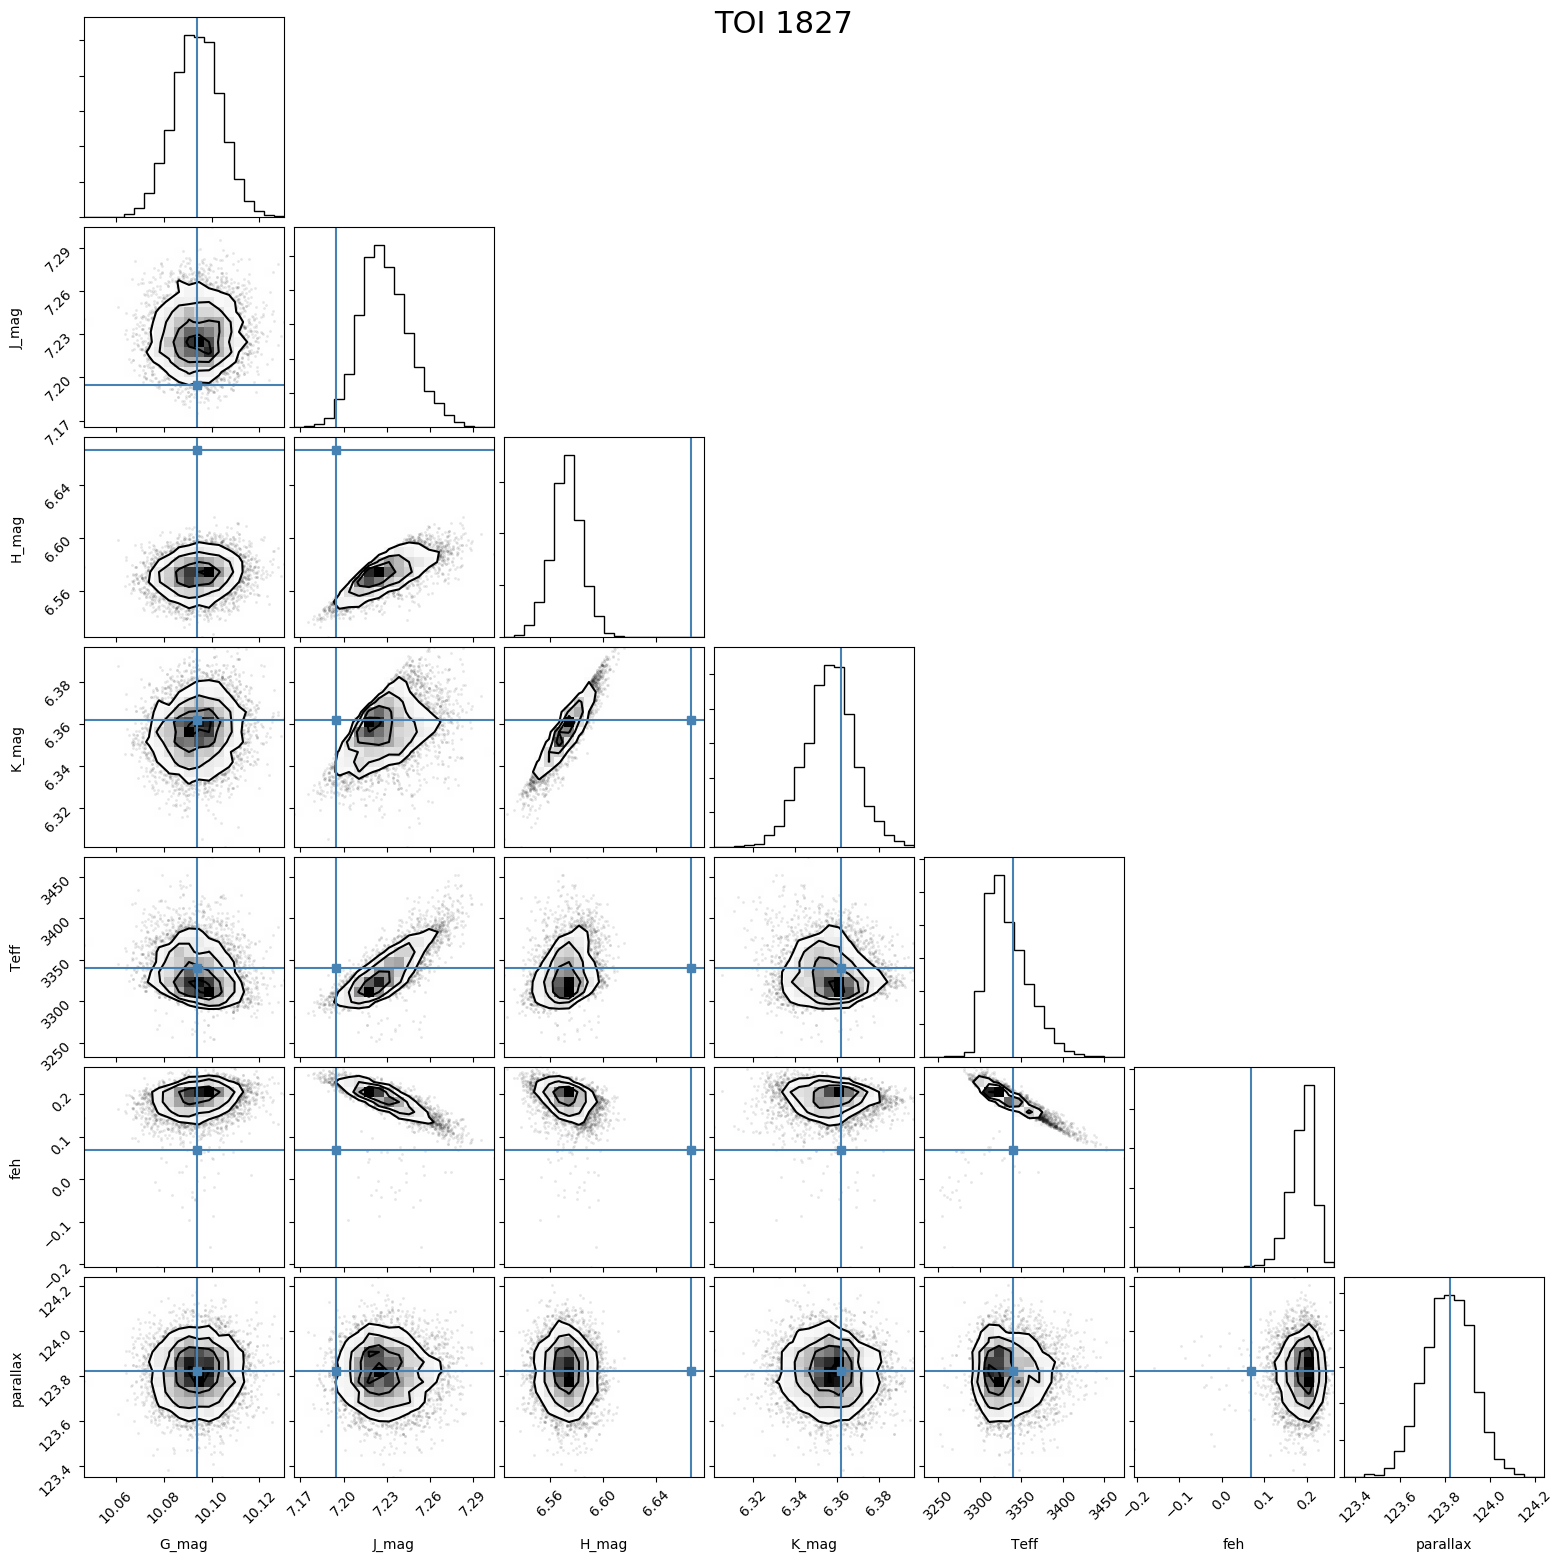

In [79]:
fig=star.plot_corner(posterior="observed")

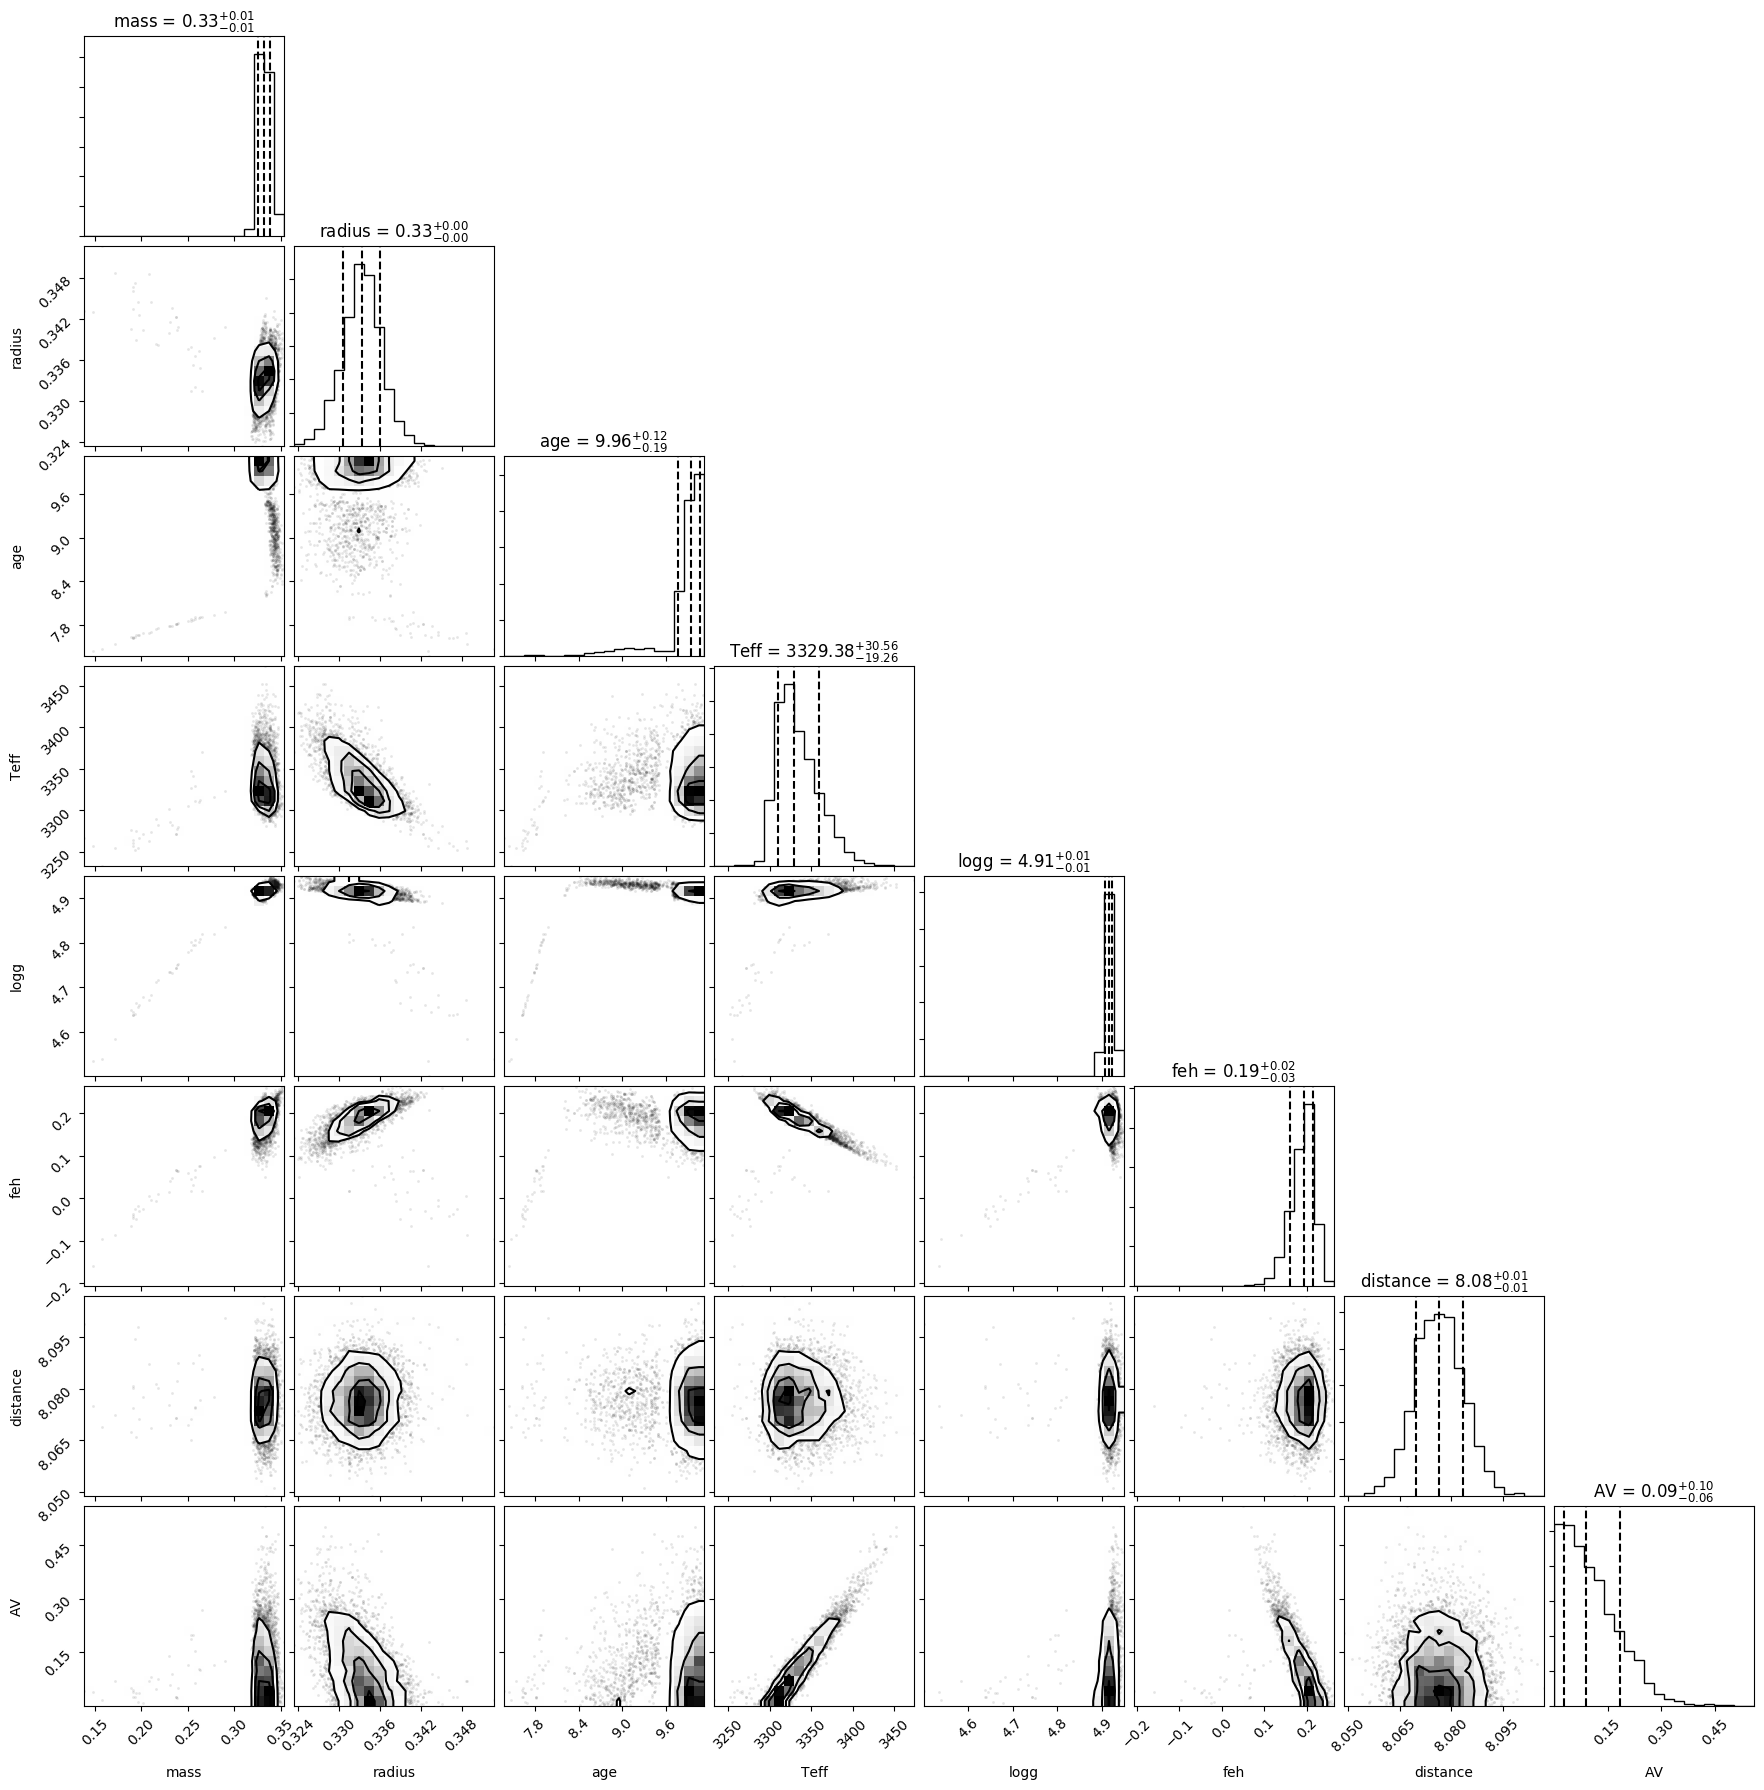

In [80]:
fig = star.plot_corner(posterior='physical')

Bright nearby M-dwarf is consistent with little to no extinction.

In [23]:
star.isochrones_model.derived_samples.describe()

,eep,age,feh,mass,initial_mass,radius,density,logTeff,Teff,logg,...,BP_mag,RP_mag,W1_mag,W2_mag,W3_mag,TESS_mag,Kepler_mag,parallax,distance,AV
count,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,...,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000
mean,286.757036,9.758432,0.291320,0.375944,0.375949,0.369241,10.534556,3.524519,3346.329954,4.878633,...,13.922744,11.339897,8.631456,8.470118,8.353248,11.244972,12.493253,36.520943,27.381807,0.006840
std,18.926698,0.337965,0.013111,0.004092,0.004090,0.001562,0.159852,0.000525,4.081949,0.005261,...,0.008498,0.004385,0.006790,0.006935,0.006968,0.004538,0.004984,0.112204,0.084127,0.006940
min,201.236564,8.280187,0.254789,0.366356,0.366363,0.363286,10.174622,3.522982,3334.382210,4.869092,...,13.892517,11.323401,8.604302,8.444189,8.327708,11.227442,12.474864,36.145965,27.073409,0.000002
25%,278.485665,9.605894,0.282567,0.372978,0.372984,0.368233,10.428902,3.524175,3343.634375,4.874994,...,13.917055,11.336942,8.626866,8.465487,8.348554,11.241913,12.489872,36.446114,27.324496,0.001935
50%,292.517302,9.861816,0.290218,0.375253,0.375261,0.369273,10.507250,3.524463,3345.887709,4.877338,...,13.922509,11.339978,8.631514,8.470140,8.353263,11.245040,12.493125,36.520966,27.381532,0.004710
75%,300.608446,10.010450,0.298308,0.378251,0.378256,0.370280,10.606359,3.524790,3348.406859,4.880996,...,13.928422,11.342783,8.636056,8.474755,8.357908,11.248049,12.496613,36.597198,27.437767,0.009350
max,308.419220,10.129822,0.367386,0.393101,0.393101,0.374379,11.390536,3.527485,3369.198258,4.904893,...,13.956608,11.355812,8.657482,8.496923,8.380257,11.260323,12.513359,36.936612,27.665605,0.083591


In [25]:
star.isochrones_model.derived_samples.to_csv(f"{star.target_name}_posterior.csv")

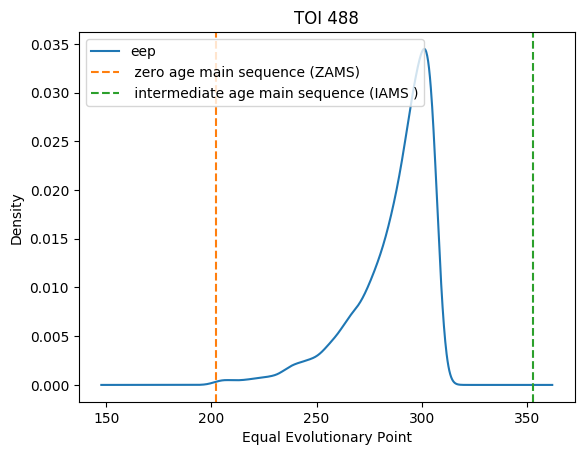

In [26]:
star.plot_posterior_eep()

In [27]:
iso_model.evidence

  analysing data from ./chains/TOI 488-mist-single-.txt


(-157.86869234689013, 0.0418037794847299)

## lightcurves

In [39]:
sc = cr.ShortCadence(toiid=star.toiid)
lc = sc.get_lc()

Target: TOI 1827
Available sectors: [23]
Using sector=23.
Using TESS short cadence.

Searching lightcurvefile for TIC 390651552 (sector 23)
Found 1 lightcurves


Using period=1.4671 d, epoch=1928.23 BTJD, duration=1.01 hr
Using biweight filter with window_length=0.13 day


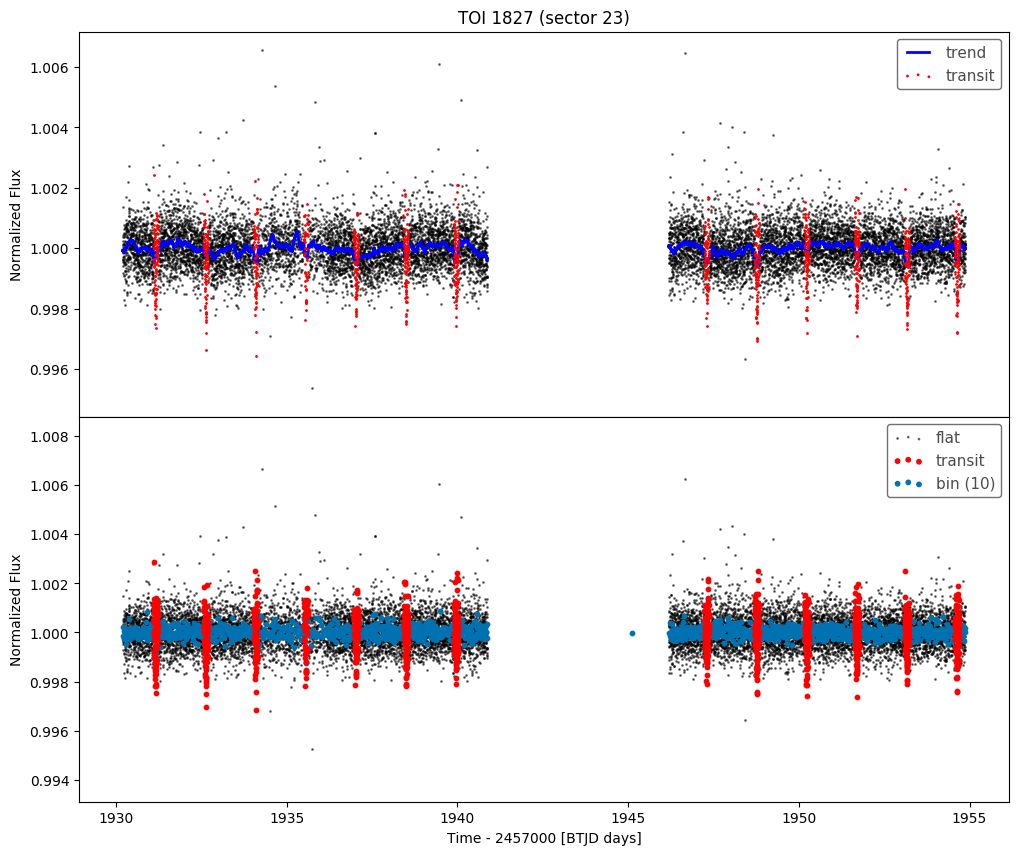

In [40]:
fig = sc.plot_trend_flat_lcs(lc)

In [41]:
flat = sc.get_flat_lc(lc)

Using biweight filter with window_length=0.13 day


  0%|          | 0/2211 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 13163 data points, 2211 periods from 0.601 to 12.343 days
Using all 8 CPU threads


100%|██████████| 2211/2211 periods | 00:09<00:00


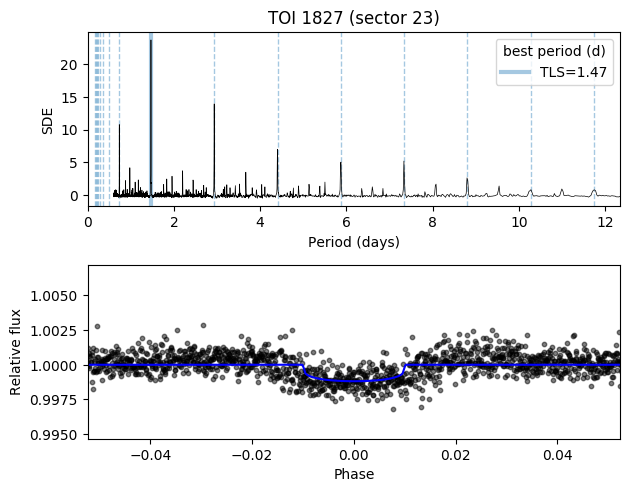

In [42]:
fig = sc.run_tls(flat)

In [43]:
sc.tls_results.SDE, (1-sc.tls_results.depth)*1e3 #ppt

(23.753758568406415, 1.1902416072070432)

In [44]:
sc.toi_depth

0.00159952799

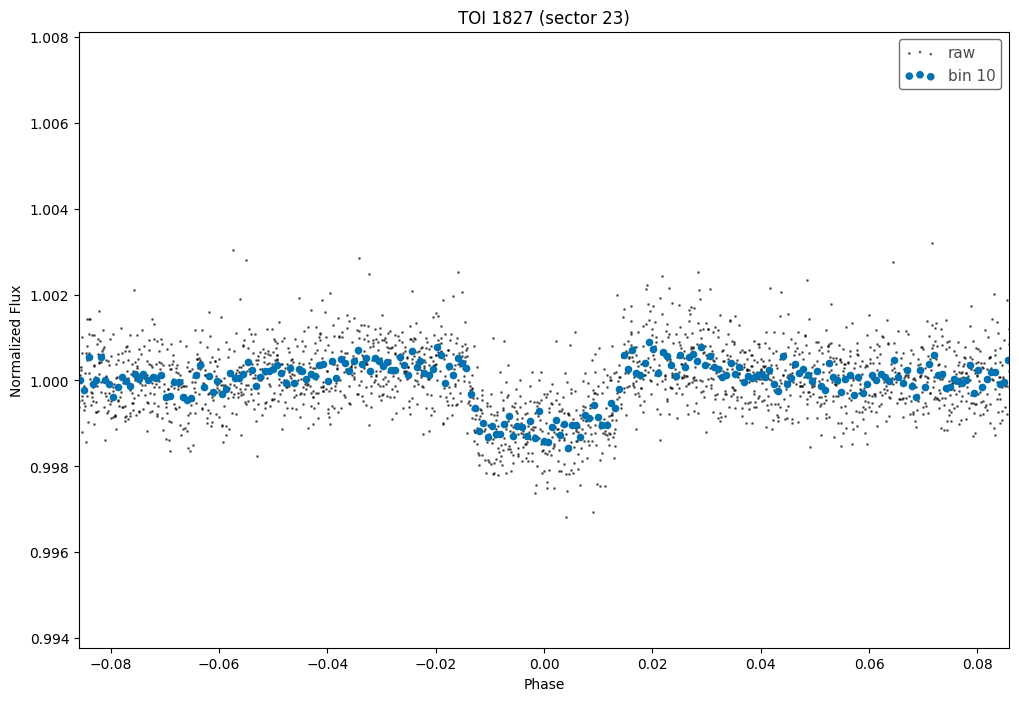

In [69]:
import matplotlib.pyplot as pl

ax = sc.plot_fold_lc(flat)
# ax.plot(sc.tls_results['model_folded_phase']-0.5,
#         sc.tls_results['model_folded_model'],
#         'r-',
#         lw=3,
#         label='TLS model'
#        )
# pl.legend()

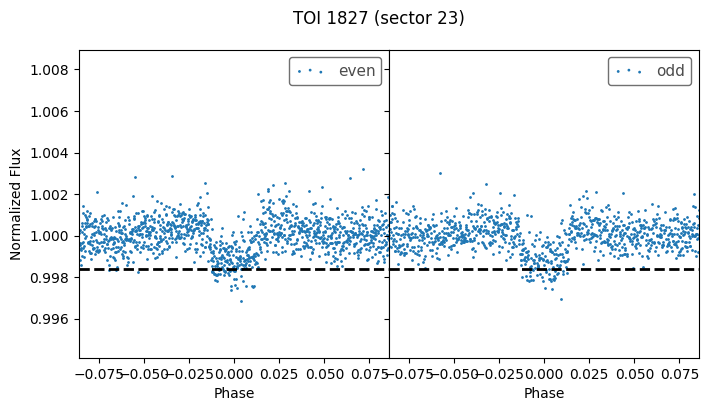

In [46]:
fig = sc.plot_odd_even(flat, duration=sc.toi_duration)

## fov

In [47]:
tpf = sc.get_tpf()


Searching mast for TIC 390651552

1 tpf(s) found in sector(s) [23]
Using data from sector 23 only




In [48]:
gaia_params = sc.query_gaia_dr2_catalog(return_nearest_xmatch=True)
gaia_sources = sc.query_gaia_dr2_catalog(radius=180)

Querying Gaia DR2 catalog for ra,dec=(191.982 9.74942) within 3.0 arcsec.
astrometric_excess_noise_sig>15.13 (>5 hints binarity).

astrometric_gof_al>28.51 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf

Querying Gaia DR2 catalog for ra,dec=(191.982 9.74942) within 180.0 arcsec.


Querying DSS2 Red (180.00 arcsec x 180.00 arcsec) archival image


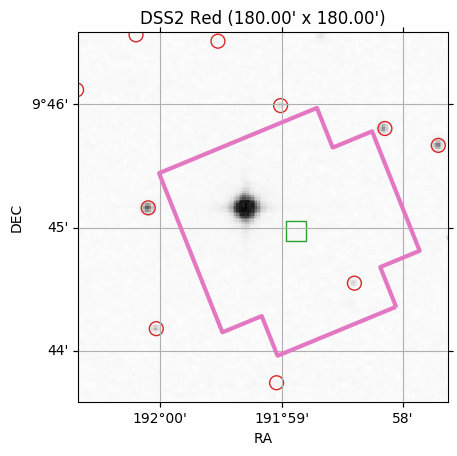

In [49]:
import astropy.units as u

#not corrected for proper motion
fig = cr.plot_gaia_sources_on_survey(tpf,
                                     target_gaiaid=sc.gaiaid,
                                     depth=sc.toi_depth*1e-6,
                                     gaia_sources=gaia_sources,
                                     survey='DSS2 Red',
                                     fov_rad=180*u.arcsec
                                    )

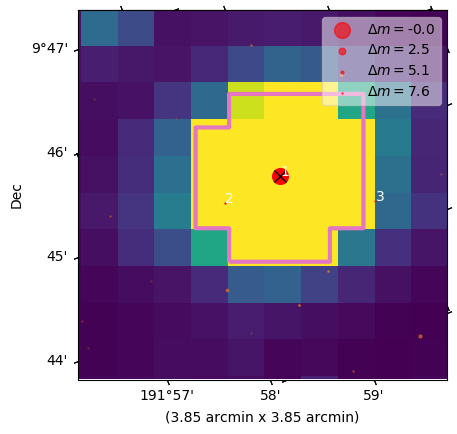

In [50]:
fig = cr.plot_gaia_sources_on_tpf(tpf,
                                 target_gaiaid=sc.gaiaid,
                                 depth=sc.toi_depth*1e-6,
                                 gaia_sources=gaia_sources,
                                 )

In [59]:
star.get_nearby_gaia_sources(depth=star.toi_depth, radius=120)

Querying Gaia DR2 catalog for ra,dec=(191.982 9.74942) within 120.0 arcsec.


,source_id,parallax,astrometric_gof_al,astrometric_excess_noise_sig,separation,phot_g_mean_mag,delta_Gmag,gamma_pri,gamma_sec,true_depth_pri,true_depth_sec,true_depth_sec>1(cleared?)
0,3735000631158990976,123.821473,28.511068,15.125317,0.038310,10.093957,0.000000,2.000000,2.000000,0.003199,0.003199,False
1,3735000592503232512,NaN,-0.005855,0.052219,38.270793,18.440784,8.346828,1.000458,2182.378559,0.001600,3.490776,True
2,3735000798661670272,0.510873,-0.418959,0.000000,61.397331,18.945454,8.851497,1.000288,3473.151608,0.001600,5.555403,True
3,3735003654815953536,1.902822,0.924162,0.097171,66.021028,16.686502,6.592546,1.002307,434.529086,0.001603,0.695041,False
4,3735000734238192640,0.426526,-1.296620,0.000000,72.762305,15.672402,5.578445,1.005870,171.364146,0.001609,0.274102,False
5,3735000386344927104,NaN,2.595914,0.000000,74.631847,21.163473,11.069516,1.000037,26780.747634,0.001600,42.836555,True
6,3735000665518715136,0.542828,-3.583918,0.000000,77.623019,15.563476,5.469519,1.006489,155.101718,0.001610,0.248090,False
7,3735003654815953408,0.639794,-0.653436,0.000000,80.859711,16.609837,6.515880,1.002475,404.972573,0.001603,0.647765,False
8,3735000420704538624,1.169958,4.111124,3.821500,83.048517,17.668960,7.575003,1.000933,1072.522365,0.001601,1.715530,True
9,3735003616161383552,2.964490,3.034534,0.264951,98.681265,20.839745,10.745788,1.000050,19876.363491,0.001600,31.792800,True


In [51]:
sc.contratio

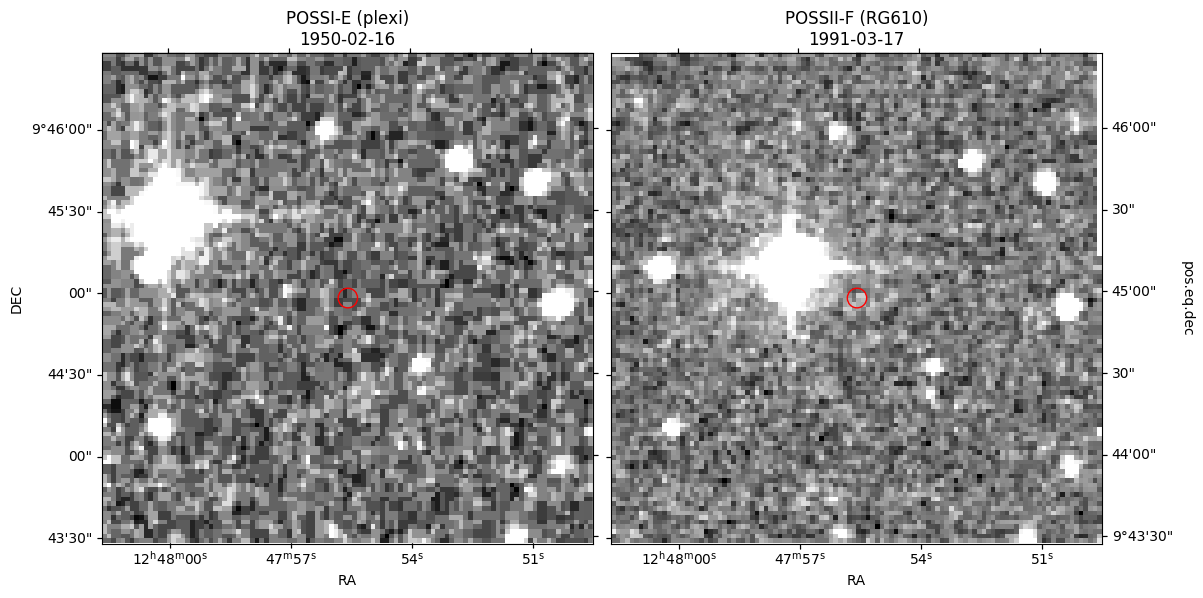

In [57]:
ra = star.target_coord.ra.deg
dec = star.target_coord.dec.deg

fig = cr.plot_archival_images(ra, dec, 
                             survey1='dss1',
                             survey2='poss2ukstu_red',
                              height=3,
                              width=3 #arcmin
                             )

## HARPS bank RVs

In [34]:
harps_bank_table = star.query_harps_bank_table()
harps_bank_table

Loaded: /home/jp/github/research/project/chronos/chronos/data/HARPS_RVBank_table.csv

There are 1 matches: ['HIP62452']
                                                 2686
G [mag]                                        10.094
Dist [pc]                                        8.08
Data products (ascii)  HIP62452_harps_all-data_v1.dat
Data products (csv)    HIP62452_harps_all-data_v1.csv




,Target,RA,DEC,Sp. Type,T_eff [K],B [mag],V [mag],G [mag],Dist [pc],Data products (ascii),Data products (csv)
2686,HIP62452,12:47:56.6249,+09:45:05.031,M3.5Ve,NaN,12.958,11.395,10.094,8.08,HIP62452_harps_all-data_v1.dat,HIP62452_harps_all-data_v1.csv


Saved:  /home/jp/github/research/project/chronos/chronos/data/HIP62452_harps_all-data_v1.csv
harps bank data validated.


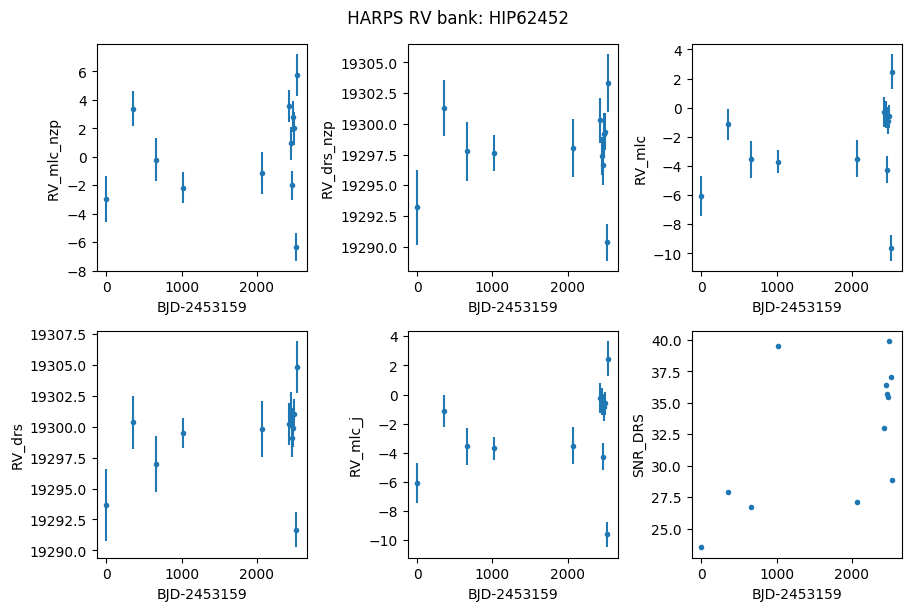

In [35]:
fig = star.plot_harps_rv_scatter()

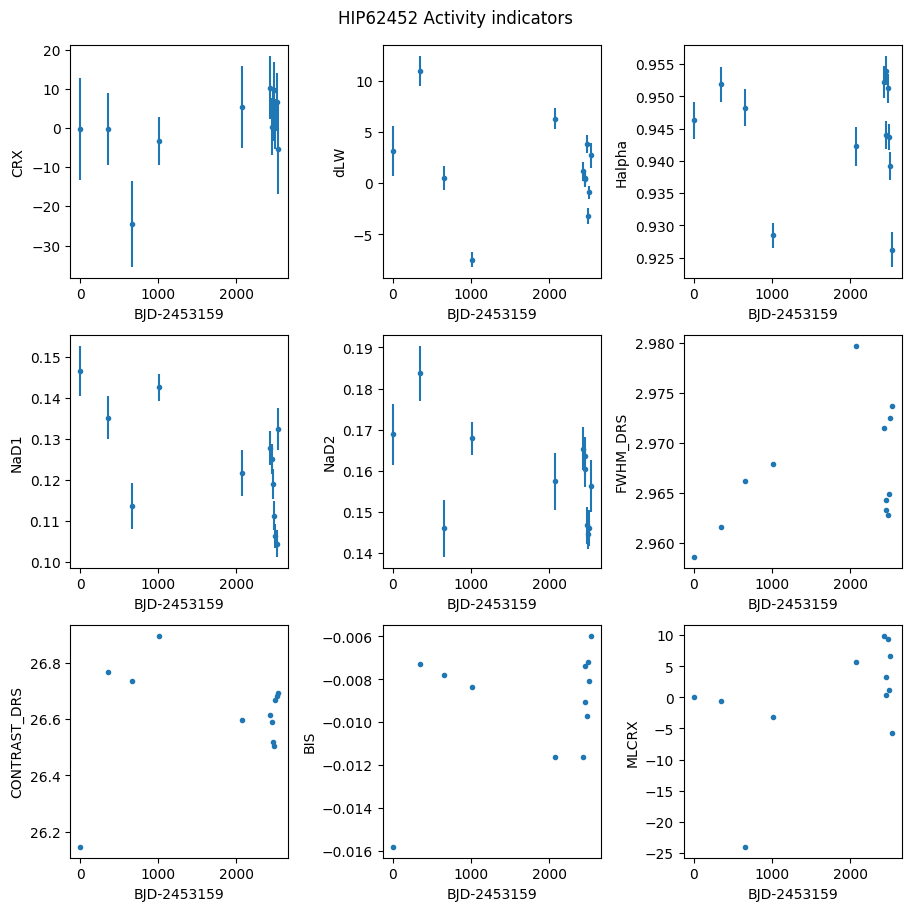

In [36]:
fig = star.plot_harps_rv_scatter("activity")

 10%|█         | 1/10 [00:00<00:00,  9.62it/s]

Computing generalized Lomb-Scargle periodograms:
['RV_mlc_nzp', 'RV_drs_nzp', 'CRX', 'dLW', 'Halpha', 'NaD1', 'NaD2', 'FWHM_DRS', 'CONTRAST_DRS', 'BIS']


100%|██████████| 10/10 [00:01<00:00,  9.43it/s]


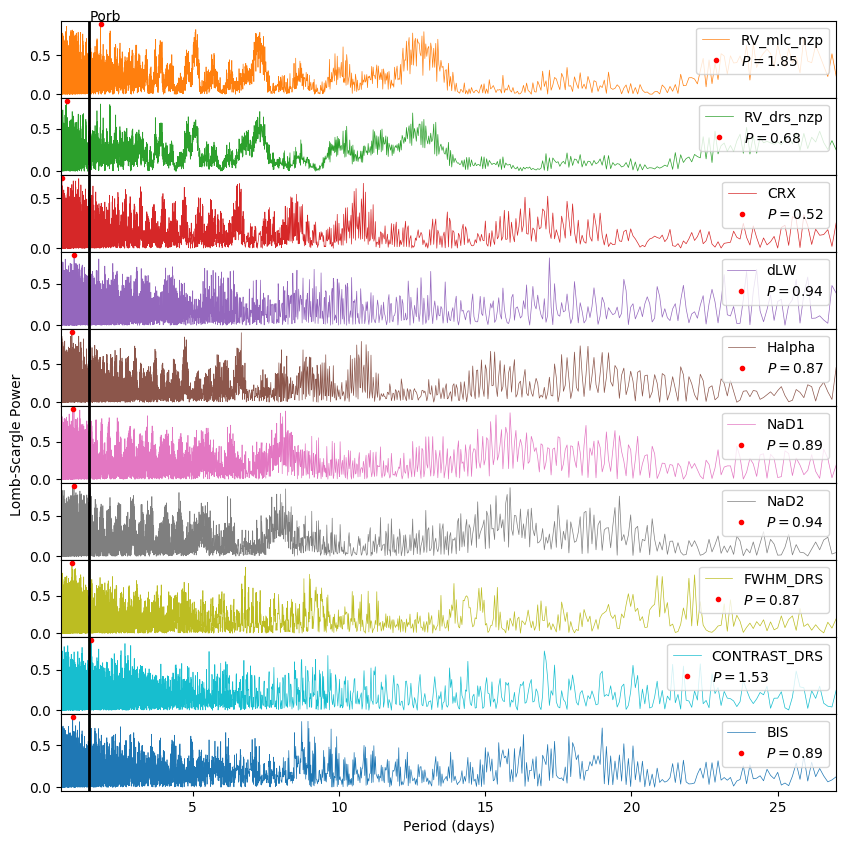

In [37]:
fig = star.plot_harps_rv_gls()

## cluster membership

In [38]:
star.get_cluster_membership() #unlikely a cluster member

Found 0 references with Assoc
ra: 7 matched
dec: 10 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_73:
['ra']
Target not likely a cluster member
